# <center> <img src="../../labs/img/ITESOLogo.png" alt="ITESO" width="480" height="130"> </center>
# <center> **Departamento de Electrónica, Sistemas e Informática** </center>
---
### <center> **Big Data** </center>
---
### <center> **Spring 2025** </center>
---
**Mid-term exam**

**Date**: 3/12/2025

**Student Name**: Luther Williams Sandria

**Professor**: Pablo Camarillo Ramirez

In [1]:
import findspark
findspark.init()

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("SparkSQL-Exam-1-Luther") \
    .master("spark://a92682f5ddcc:7077") \
    .config("spark.ui.port","4040") \
    .getOrCreate()
sc = spark.sparkContext

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/03/13 01:06:02 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
from team_name.spark_utils import SparkUtils

In [14]:

sales_schema = SparkUtils.generate_schema([("transaction_id", "integer"), ("product_id", "integer"), ("customer_id", "integer"), ("sale_amount", "float"), ("sale_date", "date") ])

sales_df = spark.read \
                .schema(sales_schema) \
                .option("header", "true") \
                .csv("/home/jovyan/notebooks/data/sales.csv")

sales_df.printSchema()

root
 |-- transaction_id: integer (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- customer_id: integer (nullable = true)
 |-- sale_amount: float (nullable = true)
 |-- sale_date: date (nullable = true)



In [13]:
product_schema = SparkUtils.generate_schema([("product_id", "integer"), ("product_name", "string"), ("category", "string"), ("price", "float") ])

products_df = spark.read \
                .schema(product_schema) \
                .option("header", "true") \
                .csv("/home/jovyan/notebooks/data/products.csv")

products_df.printSchema()


root
 |-- product_id: integer (nullable = true)
 |-- product_name: string (nullable = true)
 |-- category: string (nullable = true)
 |-- price: float (nullable = true)



In [6]:
joined_df = sales_df.join(products_df, sales_df.product_id == products_df.product_id, "inner")

In [7]:
from pyspark.sql.functions import sum, when

total_sales_by_category = joined_df.groupBy("category") \
    .agg(sum("sale_amount").alias("total_sales"))


In [8]:
joined_df = joined_df.withColumn("sale_type", when(joined_df.sale_amount >= 50, "High").otherwise("Low"))

In [9]:
filtered_df = joined_df.filter(joined_df.category == "Electronics")

In [10]:
selected_df = filtered_df.select("product_name", "sale_amount", "sale_type")

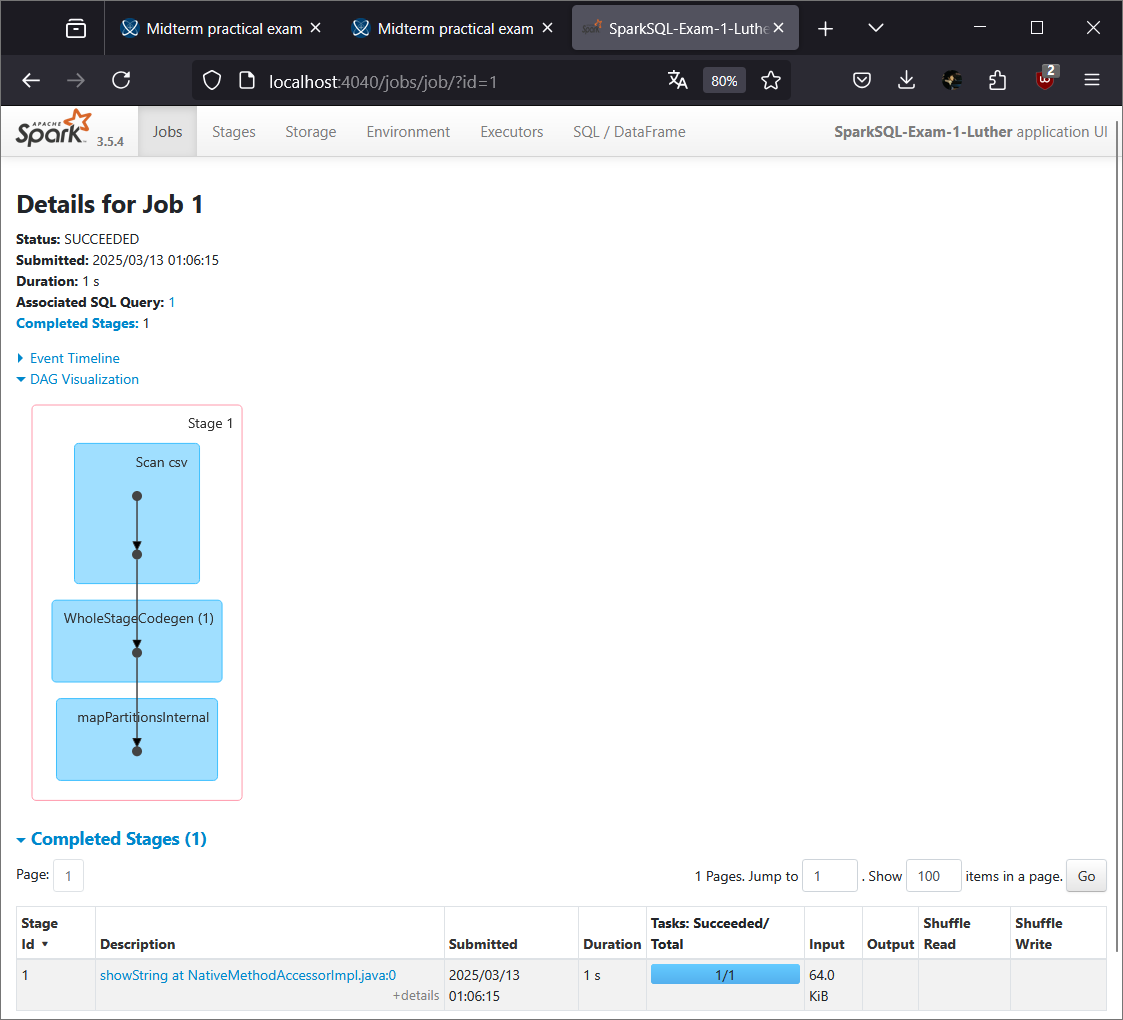

In [11]:
from PIL import Image

dag_image = Image.open("/home/jovyan/notebooks/data/image.png")
dag_image


In [12]:
selected_df.show(5, truncate=False)
print("Row count:", selected_df.count())

+------------+-----------+---------+
|product_name|sale_amount|sale_type|
+------------+-----------+---------+
|Product 100 |55.14      |High     |
|Product 100 |694.06     |High     |
|Product 100 |64.41      |High     |
|Product 100 |472.98     |High     |
|Product 100 |228.41     |High     |
+------------+-----------+---------+
only showing top 5 rows

Row count: 612
